# notes

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter

%matplotlib inline

In [22]:
from operator import itemgetter

def orderDict(x: dict, desc=True):
    return sorted(x.items(), key=itemgetter(1), reverse=desc)

# Degree Distribution
he degree distribution, P(k) of a network is the number of nodes of degree k, divided by the total number of nodes, i.e.:

P(k) = (# nodes with k-degree) / len(g.nodes())

### Example 1

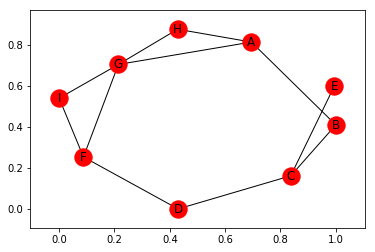

In [28]:
g = nx.Graph()
g.add_edges_from([
    ('A', 'H'), ('H', 'G'), ('I', 'G'), ('I', 'F'), 
    ('A', 'G'), ('G', 'F'), ('A', 'B'), ('F', 'D'), 
    ('B', 'C'), ('D', 'C'), ('C', 'E')
])

pos = nx.draw_networkx(g)


In [29]:
{'degrees': dict(g.degree()), 'sum': sum(dict(g.degree()).values())}

{'degrees': {'A': 3,
  'B': 2,
  'C': 3,
  'D': 2,
  'E': 1,
  'F': 3,
  'G': 4,
  'H': 2,
  'I': 2},
 'sum': 22}

In [30]:
nodes_cnt = len(g.nodes())
nodes_cnt

9

In [31]:
dg_values = sorted(set(dict(g.degree()).values()))
dg_values

[1, 2, 3, 4]

In [32]:
higher_degree = orderDict(dict(g.degree()))[0][1]
higher_degree

4

In [43]:
degrees = [degree for node, degree in g.degree_iter()]
degrees

[3, 2, 4, 2, 3, 2, 2, 3, 1]

In [44]:
dg_cnt = {}

# We could start from degree zero, but we know theres no node with such degree
for d in range(1, higher_degree + 1): 
    dg_cnt[str(d)] = degrees.count(d)

dg_cnt

{'1': 1, '2': 4, '3': 3, '4': 1}

In [45]:
dg_dist = {}

for dg, cnt in dg_cnt.items():
    dg_dist[dg] = (cnt/nodes_cnt)

dg_dist

{'1': 0.1111111111111111,
 '2': 0.4444444444444444,
 '3': 0.3333333333333333,
 '4': 0.1111111111111111}

In [47]:
plt.bar(x=dg_cnt.keys(), height=dg_cnt.values())

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.xlabel('Degree').set_color("red")
plt.ylabel('Fraction of nodes').set_color("red")

TypeError: bar() missing 1 required positional argument: 'left'

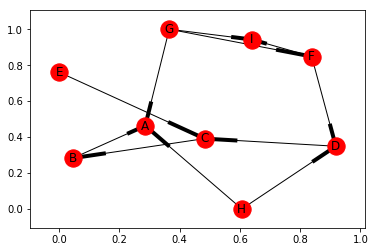

In [49]:
# example 2
g = nx.DiGraph()
g.add_edges_from([
    ('H', 'A'), ('H', 'D'), ('G', 'I'), ('F', 'I'), 
    ('G', 'A'), ('G', 'F'), ('F', 'D'), ('B', 'A'), 
    ('C', 'B'), ('D', 'C'), ('E', 'C')
])

nx.draw_networkx(g)


In [50]:
num_of_nodes = nx.number_of_nodes(g)
num_of_nodes

9

In [52]:
in_degrees_list = [degree for node, degree in g.in_degree_iter()]
in_degrees_list

[0, 3, 2, 0, 2, 1, 1, 2, 0]

In [53]:
higher_degree = orderDict(dict(g.degree()))[0][1]
higher_degree

3

In [54]:
dg_cnt = {}
for d in range(0, higher_degree + 1): 
    dg_cnt[str(d)] = in_degrees_list.count(d)

dg_cnt

{'0': 3, '1': 2, '2': 3, '3': 1}

In [55]:
dg_dist = {}
for dg, cnt in dg_cnt.items():
    dg_dist[dg] = (cnt/nodes_cnt)

dg_dist

{'0': 0.3333333333333333,
 '1': 0.2222222222222222,
 '2': 0.3333333333333333,
 '3': 0.1111111111111111}

In [56]:
plt.bar(x=dg_cnt.keys(), height=dg_cnt.values())

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.xlabel('Degree').set_color("red")
plt.ylabel('Fraction of nodes').set_color("red")

TypeError: bar() missing 1 required positional argument: 'left'

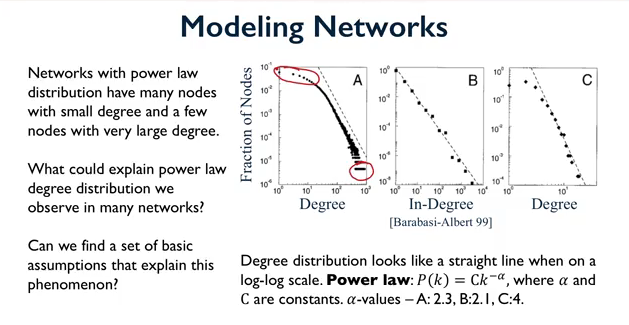
referential Attachment Model
Start with 2 nodes at time k = 0;

At each time k + 1, add a new node with an edge connecting it to an existing node;

The probability of a new node v connecting to a node u of degree d(u) is: d(u)/sum(g.degrees())
### Example 3
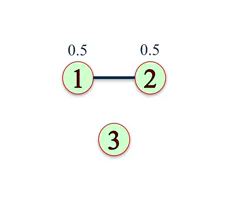

In [57]:
degree_1 = 1
degree_2 = 1
sum_degree = 2

# Probabilty of node 3 attaching to each node
p_3_to_1 = round(degree_1/sum_degree, 2)
p_3_to_2 = round(degree_2/sum_degree, 2)

{'prob_of_1': p_3_to_1, 'prob_of_2': p_3_to_2}

{'prob_of_1': 0.5, 'prob_of_2': 0.5}

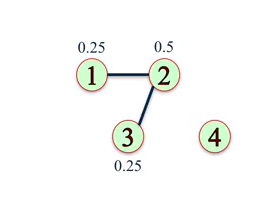

In [58]:
degree_1 = 1
degree_2 = 2
degree_3 = 1
sum_degree = 4

# Probabilty of node 4 attaching to node each node
p_4_to_1 = round(degree_1/sum_degree, 2)
p_4_to_2 = round(degree_2/sum_degree, 2)
p_4_to_3 = round(degree_3/sum_degree, 2)

{'prob_of_1': p_4_to_1, 'prob_of_2': p_4_to_2, 'prob_of_3': p_4_to_3}

{'prob_of_1': 0.25, 'prob_of_2': 0.5, 'prob_of_3': 0.25}

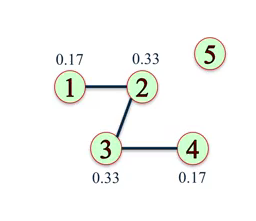

In [59]:
degree_1 = 1
degree_2 = 2
degree_3 = 2
degree_4 = 1
sum_degree = 6

# Probabilty of node 5 attaching to node each node
p_5_to_1 = round(degree_1/sum_degree, 2)
p_5_to_2 = round(degree_2/sum_degree, 2)
p_5_to_3 = round(degree_3/sum_degree, 2)
p_5_to_4 = round(degree_4/sum_degree, 2)

{'prob_of_1': p_5_to_1, 'prob_of_2': p_5_to_2,
 'prob_of_3': p_5_to_3, 'prob_of_4': p_5_to_3}

{'prob_of_1': 0.17, 'prob_of_2': 0.33, 'prob_of_3': 0.33, 'prob_of_4': 0.33}

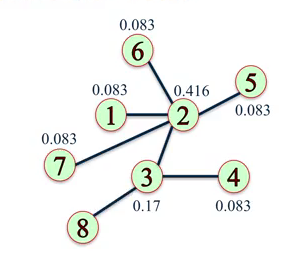
As the number of nodes increases, the degree distribution of the network under the Preferential Attachment Model approaches the Power Law

f(k) = C * k^(-3), with constant C

The Pref. Attachment Model produces networks with degree distributions similar to real networks. "Rich Get Richer phenomenon"

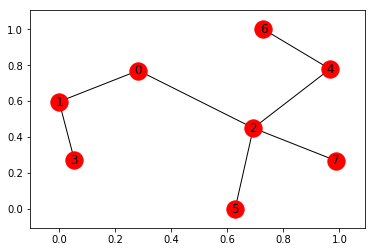

In [60]:
g = nx.barabasi_albert_graph(8, 1)
nx.draw_networkx(g)


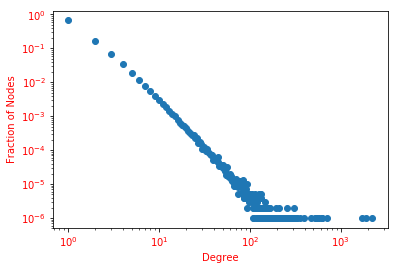

In [61]:
g = nx.barabasi_albert_graph(1000000, 1)
degrees = dict(g.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(g)) for i in degree_values]
plt.plot(degree_values, histogram, 'o')

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]


plt.xlabel('Degree').set_color('red')
plt.ylabel('Fraction of Nodes').set_color('red')
plt.xscale('log')
plt.yscale('log')
plt.show()

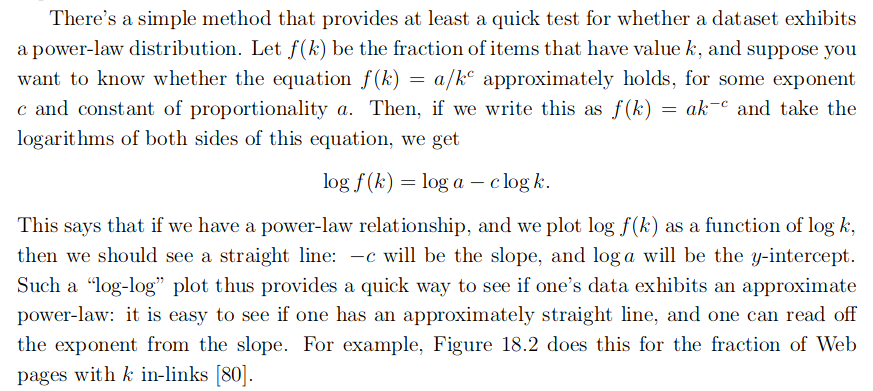
[...] "Just as normal distributions arise frommany independent random decisions averaging out, we will find that power laws arise from the feedback introduced by correlated decisions across a population."

## Milgram Small World Experiment
Set up:

296 Randomly chosen 'starters' asked to foward a letter to a 'target'
Target was a stockbroker in Boston
Instructions:

Send letter to target if you know him on a first name basis
Else, send it to someone else along with the instructions
Results:

64/296 Letters reached the target
Median chain lenght was 6
## Path Lenght and Clustering
Social networks tend to have high clustering coeff and small average path lenght

### Example 6

In [62]:
g = nx.barabasi_albert_graph(1000, 4)
# Note that the values may differ from the course cause 
# the generate network won't probably be the same
nx.average_clustering(g), nx.average_shortest_path_length(g)

(0.031662562067931166, 3.2063903903903905)

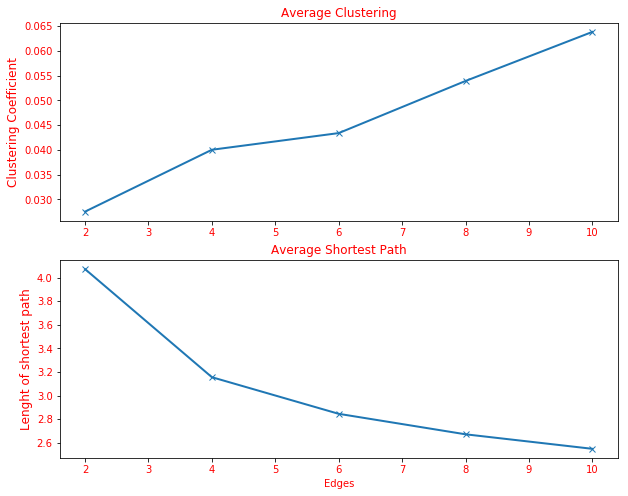

In [63]:
g2 = nx.barabasi_albert_graph(1000, 2)
g4 = nx.barabasi_albert_graph(1000, 4)
g6 = nx.barabasi_albert_graph(1000, 6)
g8 = nx.barabasi_albert_graph(1000, 8)
g10 = nx.barabasi_albert_graph(1000, 10)
graphList = [g2, g4, g6, g8, g10]
edges = [2, 4, 6, 8, 10]
data = [(nx.average_clustering(g), nx.average_shortest_path_length(g)) for g in graphList]
avg_clst = [m[0] for m in data]
avg_sh_path = [m[1] for m in data]
plt.figure()

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(edges, avg_clst, 'x-', linewidth=2)
plt.title('Average Clustering').set_color('red')
# plt.xlabel('Edges').set_color('red')
plt.ylabel('Clustering Coefficient', size=12).set_color('red')

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.subplot(2, 1, 2)
plt.plot(edges, avg_sh_path, 'x-', linewidth=2)
plt.title('Average Shortest Path').set_color('red')
plt.xlabel('Edges').set_color('red')
plt.ylabel('Lenght of shortest path', size=12).set_color('red')

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.show()

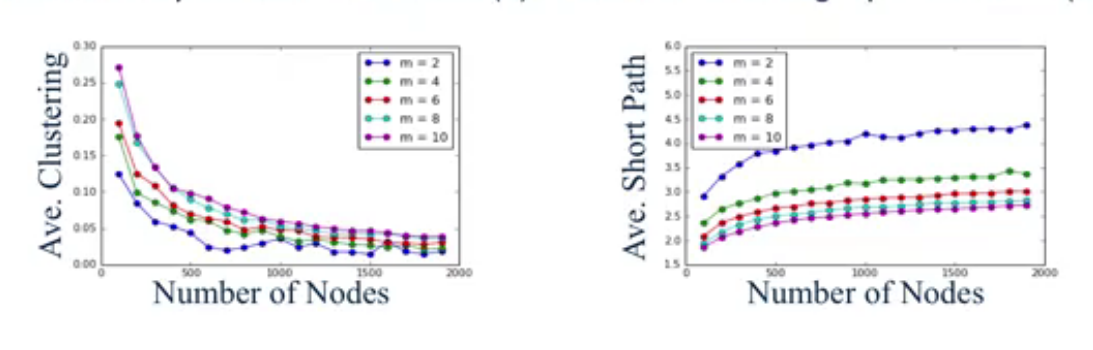
Small World Model
Real networks exhibit high clustering coefficient and small average shortest pahts

Small-world model:

Start with a ring of n nodes, where each node is connected to its k nearest neighbors
Fix a parameter p in [0,1]
Consider each edge (u, v). With probability p, select a node w at random and rewire the edge (u, v) to (u, w)
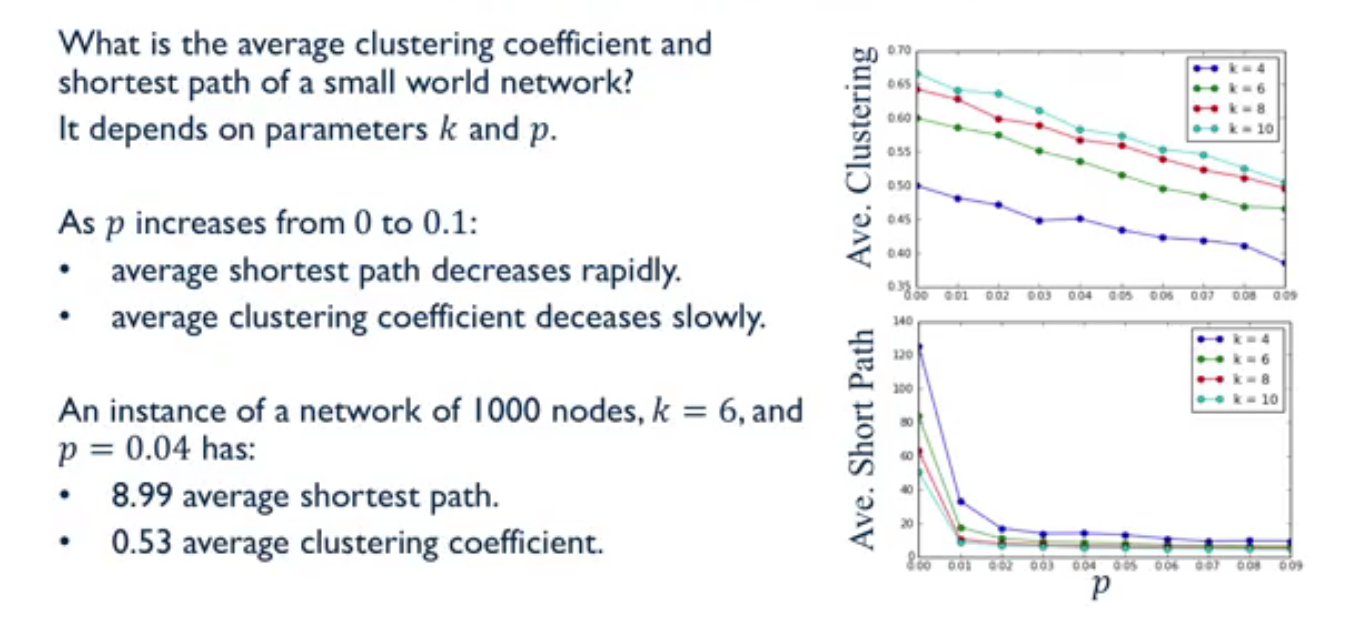


In [64]:
# Example 8
g = nx.watts_strogatz_graph(n=1000, k=6, p=0.04)
nx.average_shortest_path_length(g), nx.average_clustering(g)

(8.00531931931932, 0.5265404761904816)

In [65]:
nx.is_connected(g)

True

In [ ]:
# Theres a chance that the generated network can me disconnected, and to ensure that it has only one connected component, we may use another method

In [66]:
# Example 9
# Runs the algorithm up to 't' times, until it returns a conected small world network
g = nx.connected_watts_strogatz_graph(n=1000, k=6, p=0.04, tries=2)
nx.is_connected(g)

True

In [67]:
nx.average_shortest_path_length(g), nx.average_clustering(g)

(8.211953953953953, 0.5303476190476253)

In [68]:
# Example 10
# Runs a similar model to the small world network, but rather then rewiring, new edges
# are added with probability 'p'
g = nx.newman_watts_strogatz_graph(n=1000, k=6, p=0.04)
nx.is_connected(g)

True

In [69]:
nx.average_shortest_path_length(g), nx.average_clustering(g)

(8.362334334334335, 0.5625666666666764)

# Common neighbors
We define it as comm|on(X,Y) = |N(X) inter N(Y)|, where N(X) is the set of neighbors of node X

### Example 11

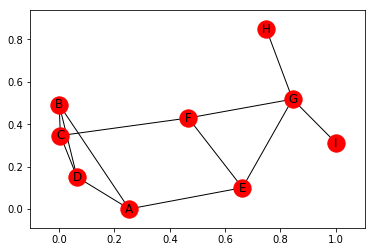

In [70]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('B', 'C'), ('B', 'D'), ('A', 'D'), 
        ('D', 'C'), ('A', 'E'), ('C', 'F'), ('E', 'F'), 
        ('E', 'G'), ('F', 'G'), ('G', 'H'), ('G', 'I')
    ]
)

nx.draw_networkx(g)

In [71]:
list(nx.common_neighbors(g, 'H', 'I'))

['G']

In [72]:
list(nx.common_neighbors(g, 'C', 'A'))

['B', 'D']

In [73]:
(
    list(nx.common_neighbors(g, 'G', 'A')),
    list(nx.common_neighbors(g, 'I', 'A'))
)

(['E'], [])

In [74]:
# all common neighbors
comm_neig = [(e[0], e[1], len(list(nx.common_neighbors(g, e[0], e[1])))) for e in nx.non_edges(g)]

comm_neig[:5]

[('D', 'G', 0), ('D', 'F', 1), ('D', 'E', 1), ('D', 'I', 0), ('D', 'H', 0)]

In [75]:
sorted(comm_neig, key=itemgetter(2), reverse=True)[:5]

[('C', 'A', 2), ('D', 'F', 1), ('D', 'E', 1), ('G', 'A', 1), ('G', 'C', 1)]

## Jaccard Coefficient
Number of neighbors normalized by the total number of neighbors

In [76]:
sorted(list(nx.jaccard_coefficient(g)), key=itemgetter(2), reverse=True)[:5]

[('I', 'H', 1.0),
 ('C', 'A', 0.5),
 ('F', 'I', 0.3333333333333333),
 ('F', 'H', 0.3333333333333333),
 ('E', 'I', 0.3333333333333333)]

##  Resource Allocation Index


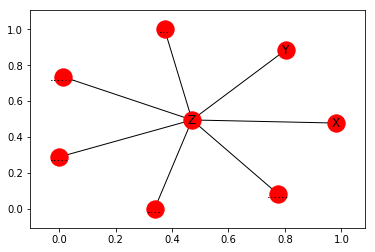

In [78]:
_g = nx.Graph()
_g.add_edges_from([('X', 'Z'), ('Z', 'Y'), 
                   ('Z', '...'), ('Z', '....'),
                   ('Z', '.....'), ('Z', '......'),
                   ('Z', '.......'), ])

nx.draw_networkx(_g)

In [79]:
 list(nx.resource_allocation_index(g))
# ('H', 'I', 0.25)

[('D', 'G', 0),
 ('D', 'F', 0.3333333333333333),
 ('D', 'E', 0.3333333333333333),
 ('D', 'I', 0),
 ('D', 'H', 0),
 ('G', 'A', 0.3333333333333333),
 ('G', 'B', 0),
 ('G', 'C', 0.3333333333333333),
 ('F', 'A', 0.3333333333333333),
 ('F', 'B', 0.3333333333333333),
 ('F', 'I', 0.25),
 ('F', 'H', 0.25),
 ('C', 'A', 0.6666666666666666),
 ('C', 'I', 0),
 ('C', 'E', 0.3333333333333333),
 ('C', 'H', 0),
 ('E', 'B', 0.3333333333333333),
 ('E', 'I', 0.25),
 ('E', 'H', 0.25),
 ('B', 'I', 0),
 ('B', 'H', 0),
 ('I', 'A', 0),
 ('I', 'H', 0.25),
 ('H', 'A', 0)]

## Adamic-Adar Index
Similar to Resource Allocation Index, but with log in the denominator



In [ ]:
# list(nx.adamic_adar_index(g))
#  ('H', 'I', 0.7213475204444817)

## Preferential Attachment Model
Nodes with high degree get more neighbors

The preferential attachment score of nodes x,y is:

pref_attach(x, y) = |N(X)| * |N(Y)|, where N(u) is the number of neighbors

In [80]:
# top 5
sorted(list(nx.preferential_attachment(g)), key=itemgetter(2), reverse=True)[:5]

[('D', 'G', 12), ('G', 'A', 12), ('G', 'B', 12), ('G', 'C', 12), ('D', 'F', 9)]

## Community Structure
Some measures consider the community structures of the network for link prediction

Assume the nodes in this network belong to two different communities (sets of nodes)
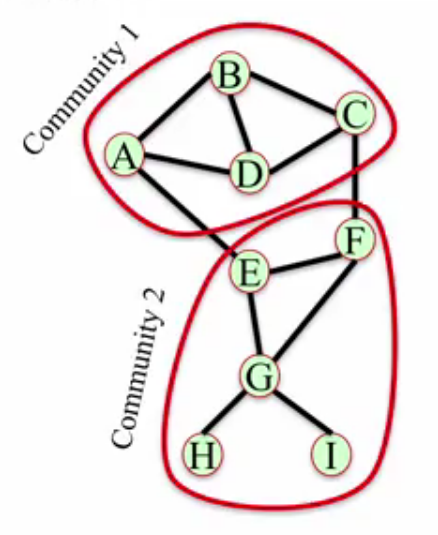
airs of nodes who belong in the same community and have many common neighbors in their community are likely to form and edge (close a triad)

Number of neighbors in the same community (Soundarajan-Hopcroft Score):

cn_soundarajan_hopcroft(X, Y) = |N(X) inter N(Y)| + sum(f(u)),

being u all nodes who are neighbors of X or Y,

and f(u) is such as

1, if u is a common neighbor of both X and Y
0, else

In [84]:
# example 12
g_ = g.copy()
# Set an attribute called 'community' to the nodes

g.node['A']['community'] = 0
g.node['B']['community'] = 0
g.node['C']['community'] = 0
g.node['D']['community'] = 0
g.node['E']['community'] = 1
g.node['F']['community'] = 1
g.node['G']['community'] = 1
g.node['H']['community'] = 1
g.node['I']['community'] = 1

In [85]:
g.nodes(data=True)

[('A', {'community': 0}),
 ('B', {'community': 0}),
 ('C', {'community': 0}),
 ('D', {'community': 0}),
 ('E', {'community': 1}),
 ('F', {'community': 1}),
 ('G', {'community': 1}),
 ('H', {'community': 1}),
 ('I', {'community': 1})]

In [86]:
# top 5
sorted(list(nx.cn_soundarajan_hopcroft(g)), key=itemgetter(2), reverse=True)[:5]

[('C', 'A', 4), ('F', 'I', 2), ('F', 'H', 2), ('E', 'I', 2), ('E', 'H', 2)]

## Community Resource Allocation
Similar to resource allocation, but only considering nodes in the same community

The Resource Allocation Soundarajan-Hopcroft score of nodes X,Y is:

ra_soundarajan_hopcroft(X,Y) = sum( f(u)/|N(u)| ), f(u) as above

###  Example 13

In [87]:
# top 5
sorted(list(nx.ra_index_soundarajan_hopcroft(g)), key=itemgetter(2), reverse=True)

[('C', 'A', 0.6666666666666666),
 ('F', 'I', 0.25),
 ('F', 'H', 0.25),
 ('E', 'I', 0.25),
 ('E', 'H', 0.25),
 ('I', 'H', 0.25),
 ('D', 'G', 0),
 ('D', 'F', 0),
 ('D', 'E', 0),
 ('D', 'I', 0),
 ('D', 'H', 0),
 ('G', 'A', 0),
 ('G', 'B', 0),
 ('G', 'C', 0),
 ('F', 'A', 0),
 ('F', 'B', 0),
 ('C', 'I', 0),
 ('C', 'E', 0),
 ('C', 'H', 0),
 ('E', 'B', 0),
 ('B', 'I', 0),
 ('B', 'H', 0),
 ('I', 'A', 0),
 ('H', 'A', 0)]

# quiz

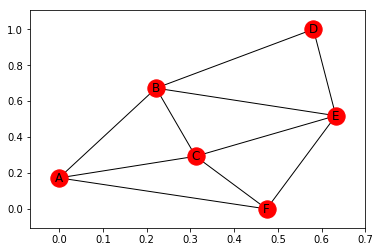

In [4]:
g = nx.Graph()
g.add_edges_from([('A', 'F'), ('F', 'E'), ('F', 'C'), ('A', 'C'), ('C', 'E'), 
                ('B', 'A'), ('B', 'C'), ('B', 'E'), ('B', 'D'), ('D', 'E'), ])

nx.draw_networkx(g)


In [5]:
degrees = dict(g.degree())
degree_sum = sum(dict(g.degree()).values())

degrees, degree_sum, len(g.nodes())

({'A': 3, 'B': 4, 'C': 4, 'D': 2, 'E': 4, 'F': 3}, 20, 6)

In [6]:
p_2 = 1/6
p_3 = 2/6

q1 = p_2 + p_3
q1

0.5

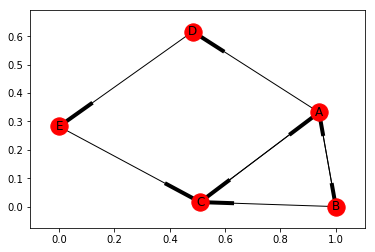

In [7]:
# quiz 2
g = nx.DiGraph()
g.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'),
                    ('B', 'A'), ('B', 'C'), 
                    ('C', 'A'),
                    ('D', 'E'),
                    ('E', 'C')])

nx.draw_networkx(g)


In [8]:
nx.number_of_nodes(g), g.in_degree()

(5, {'A': 2, 'B': 1, 'C': 3, 'D': 1, 'E': 1})

In [9]:
#k = 1 is the most common degree

#since our denominator is a fixed value nx.number_of_nodes(g)

#3/nx.number_of_nodes(g) is the highest we can achieve

q2 = 1
q2

1

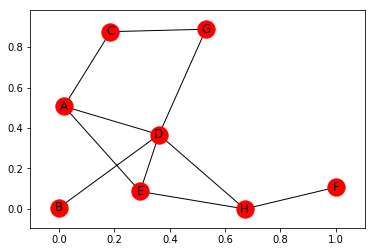

In [10]:
# quiz 6
g = nx.Graph()
g.add_edges_from(
    [
        ('C', 'G'), ('C', 'A'), ('A', 'D'), ('A', 'E'), ('G', 'D'), 
        ('D', 'E'), ('D', 'B'), ('E', 'H'), ('D', 'H'), ('H', 'F')
    ])

pos = nx.draw_networkx(g)

In [11]:
comm_neig = sorted([(e[0], e[1], len(list(nx.common_neighbors(g, e[0], e[1])))) for e in nx.non_edges(g)],
                   key=itemgetter(2),
                   reverse=True)
pairs_H = [(node, h, common) for (node, h, common) in comm_neig if (node == 'H' or h == 'H')]

In [12]:
q6 = pairs_H[0][0]
q6

'H'

In [13]:
# Number of neighbors normalized by the total number of neighbors
jacc = list(nx.jaccard_coefficient(g))
# jacc
q7_ = [wanted for wanted in jacc if (wanted[0] == 'D' and wanted[1] == 'C')]
q7 = q7_[0][2]
q7

0.4

In [14]:
rai = list(nx.resource_allocation_index(g))
q3_ = [wanted for wanted in rai if (wanted[0] == 'D' and wanted[1] == 'C')]
q3 = q3_[0][2]
q3

0.8333333333333333

In [15]:
pref = sorted(list(nx.preferential_attachment(g)), key=itemgetter(2), reverse=True)
q9_ = [wanted for wanted in pref if (wanted[0] == 'D' and wanted[1] == 'C')]
q9 = q9_[0][2]
q9

10